Importing the required packages

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

With the given block of code loading the data frame

In [42]:


header = ["variance", "skew", "curtsies", "entropy", "classes"]
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
df = pd.read_csv(url, names=header)



info() used to decribe the data contents, data type and Null values

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skew      1372 non-null   float64
 2   curtsies  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   classes   1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


head() used find the first five table content

In [44]:
df.head()


,variance,skew,curtsies,entropy,classes
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


describe() can be used for descriptive analysis

In [45]:
df.describe()

,variance,skew,curtsies,entropy,classes
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


isnll() is used to identify the null constraints 

In [46]:
df.isnull()


,variance,skew,curtsies,entropy,classes
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1367,False,False,False,False,False
1368,False,False,False,False,False
1369,False,False,False,False,False
1370,False,False,False,False,False


isnull().sum() will give the toatl sum of null values

In [47]:
df.isnull().sum()

variance    0
skew        0
curtsies    0
entropy     0
classes     0
dtype: int64

In [48]:
df.isnull().sum().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000204E9E61D30>,
      dtype=object)

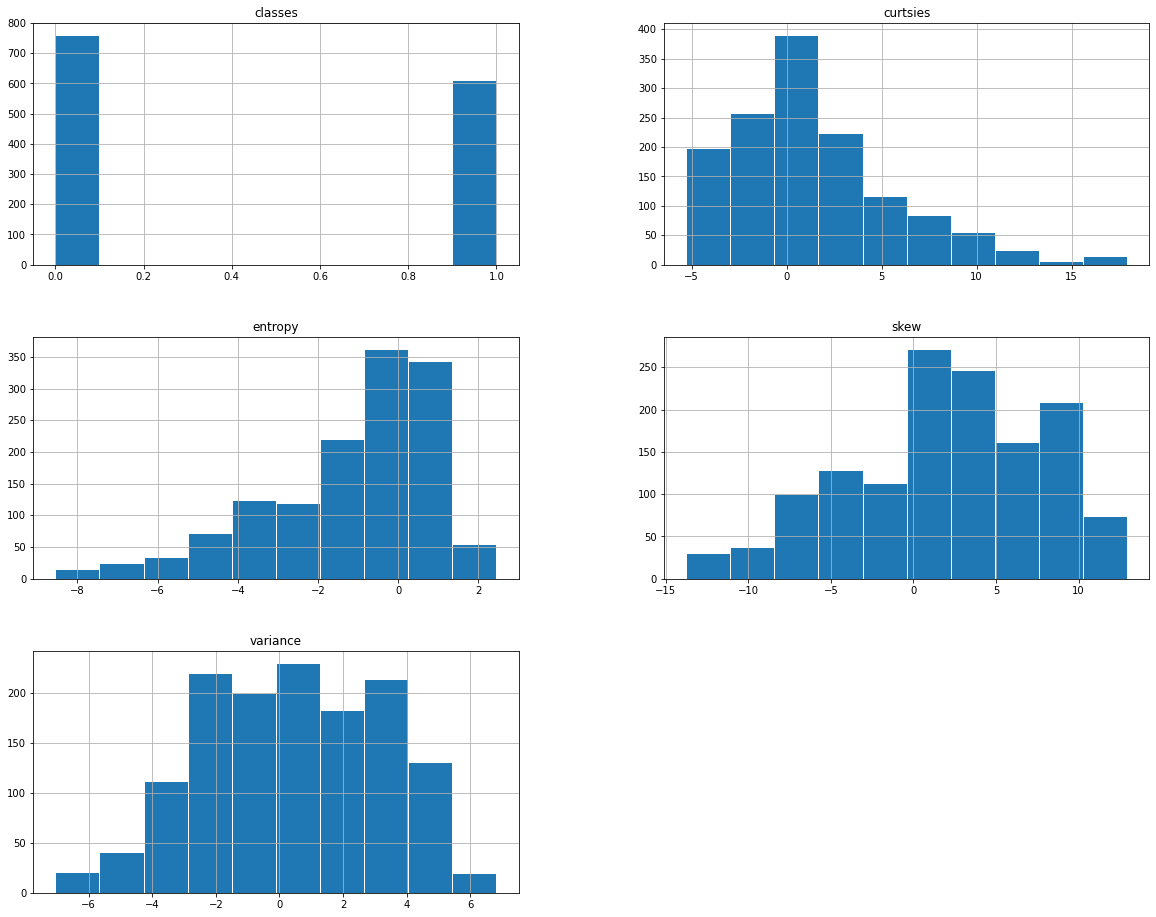

In [49]:
df.hist(edgecolor = 'white', figsize = (20,16))

pairplot is used identify the graphical ploting,With this It is visible from the below output that entropy and variance have a slight linear correlation.And also, there is an inverse linear correlation between the curtosis and skew. Therefore, we can say that the values for curtosis and entropy are slightly higher for real banknotes, while the values for skew and variance are higher for the fake banknotes. 

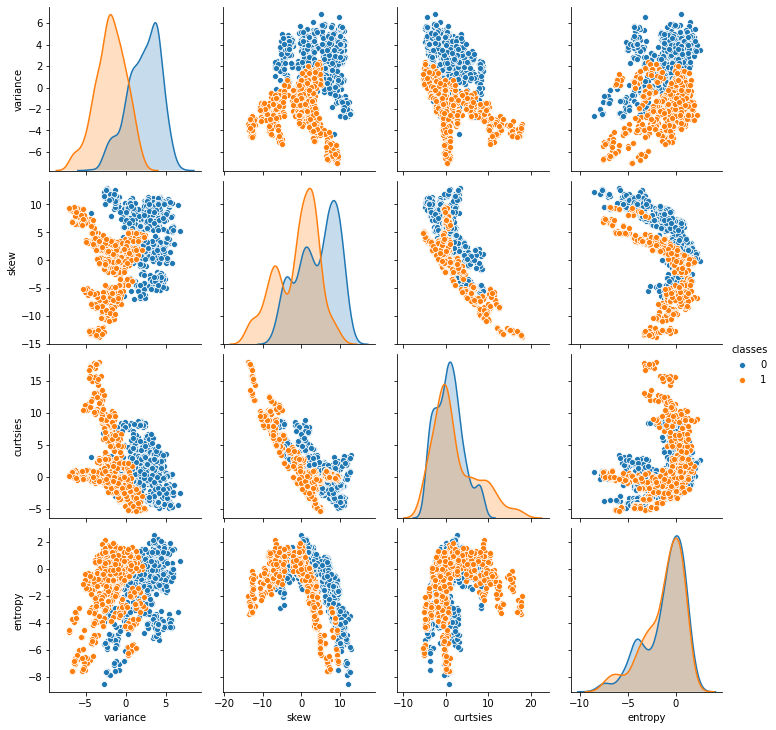

In [50]:
s =sns.pairplot(df, hue='classes')
plt.show()

x and y are the parameters

In [51]:
x = df.drop(['classes'], axis=1)
y = df['classes']

Sklearn library contains various classification,regression and clustering algorithms. And the tarin_test_split is used to split arrays or matrices inton random tarin and tests subsets.


In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=20, stratify=y)

Perceptron is an algorithm for supervised learning of binary classifiers. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class.

In [61]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(x_train, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

Tests and train

In [62]:
y_pred = ppn.predict(x_test)

In [63]:
y_test

101     0
941     1
806     1
1218    1
983     1
       ..
420     0
229     0
1361    1
1309    1
1146    1
Name: classes, Length: 549, dtype: int64

In [ ]:
Importing the metrics library to find the accuracy of the test.

In [65]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9890710382513661